In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_CAD = df[(df['job_country'] == 'Canada') & (df['job_title_short'] == 'Data Analyst')]

In [8]:
df_plot = df_DA_CAD['job_location'].value_counts().head(10).to_frame()

In [9]:
import seaborn as sns

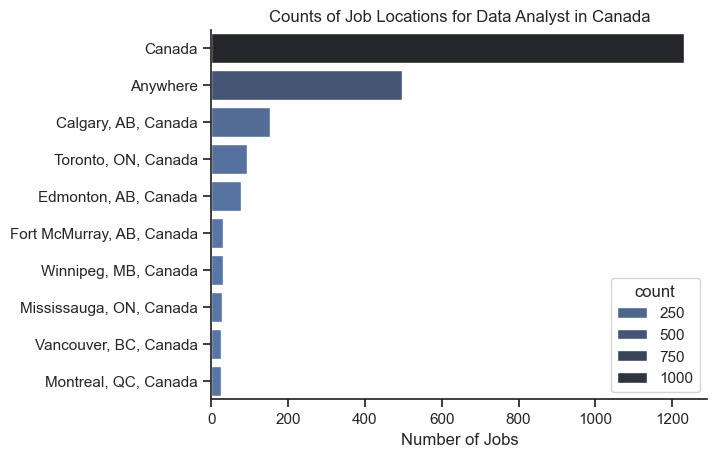

In [13]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

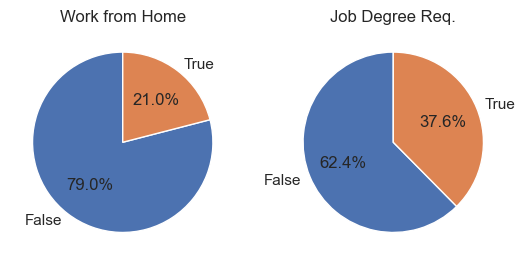

In [15]:
 fig, ax = plt.subplots(1,2)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_CAD[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

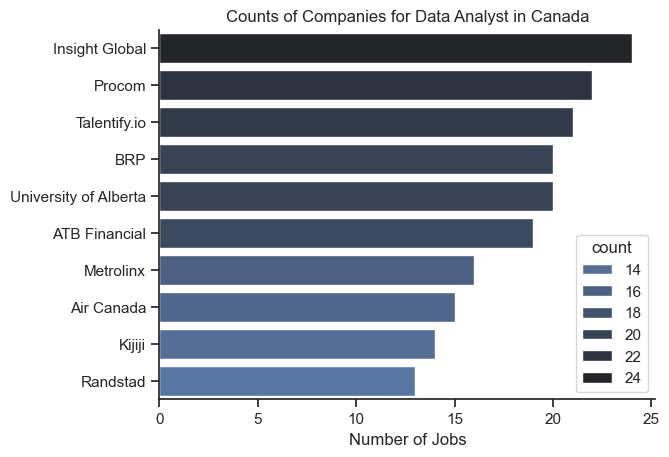

In [18]:
df_plot = df_DA_CAD['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Companies for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()